# Breast Cancer Binary Classification

In [6]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
print(tf.__version__)

2.0.0


In [10]:
data = load_breast_cancer()
# Check the type of 'data'
print(type(data))

<class 'sklearn.utils.Bunch'>


In [11]:
# Here the data is a Bunch Object
# This basically acts like a dictionary
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
# 'data' (the_attribute) means the input data
data.data.shape

(569, 30)

In [13]:
# (569, 30) -> 569 Observations and 30 Input features.
# 'target'
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [16]:
# The meaning of target i.e 0 and 1
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [18]:
# Shape of the target
data.target.shape

(569,)

In [24]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [36]:
# import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split
X = data.data
Y = data.target
# split the data into train and test sets
# this lets us simulate how our model will perform in test sets.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [37]:
print(f'The shape of our train set is: {X_train.shape}')

m, n = X_train.shape
# m and n are the number of training samples and input features respectively.

The shape of our train set is: (381, 30)


In [38]:
# Scale the data
# Normalization Z = (x - mhu)/std
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [39]:
# Build the Model

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(n,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Alternative way of initializing the Sequential Class of Keras module
# model = tf.keras.models.Sequential() # creating a class object
# model.add(tf.keras.layers.Dense(1, input_shape=(n,), activation='sigmoid'))

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

# Train the model
results = model.fit(x=X_train, 
                    y=y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=100,
                   shuffle=True,
                   steps_per_epoch=None,
                   validation_steps=None,
                   workers=4,
                   use_multiprocessing=True)

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 0s 1ms/sample - loss: 0.9323 - accuracy: 0.3386 - val_loss: 0.8681 - val_accuracy: 0.3564
Epoch 2/100
381/381 [==============================] - 0s 154us/sample - loss: 0.8443 - accuracy: 0.4278 - val_loss: 0.7883 - val_accuracy: 0.4734
Epoch 3/100
381/381 [==============================] - 0s 143us/sample - loss: 0.7644 - accuracy: 0.5013 - val_loss: 0.7196 - val_accuracy: 0.5851
Epoch 4/100
381/381 [==============================] - 0s 171us/sample - loss: 0.6960 - accuracy: 0.5906 - val_loss: 0.6609 - val_accuracy: 0.6543
Epoch 5/100
381/381 [==============================] - 0s 172us/sample - loss: 0.6376 - accuracy: 0.6614 - val_loss: 0.6102 - val_accuracy: 0.7074
Epoch 6/100
381/381 [==============================] - 0s 175us/sample - loss: 0.5873 - accuracy: 0.7113 - val_loss: 0.5667 - val_accuracy: 0.7660
Epoch 7/100
381/381 [==============================] - 0s 169us/sample - l

381/381 [==============================] - 0s 117us/sample - loss: 0.1455 - accuracy: 0.9606 - val_loss: 0.1530 - val_accuracy: 0.9681
Epoch 57/100
381/381 [==============================] - 0s 172us/sample - loss: 0.1439 - accuracy: 0.9606 - val_loss: 0.1512 - val_accuracy: 0.9681
Epoch 58/100
381/381 [==============================] - 0s 149us/sample - loss: 0.1425 - accuracy: 0.9606 - val_loss: 0.1494 - val_accuracy: 0.9681
Epoch 59/100
381/381 [==============================] - 0s 165us/sample - loss: 0.1411 - accuracy: 0.9606 - val_loss: 0.1474 - val_accuracy: 0.9681
Epoch 60/100
381/381 [==============================] - 0s 155us/sample - loss: 0.1396 - accuracy: 0.9606 - val_loss: 0.1457 - val_accuracy: 0.9681
Epoch 61/100
381/381 [==============================] - 0s 159us/sample - loss: 0.1383 - accuracy: 0.9606 - val_loss: 0.1439 - val_accuracy: 0.9681
Epoch 62/100
381/381 [==============================] - 0s 131us/sample - loss: 0.1370 - accuracy: 0.9606 - val_loss: 0.1423 

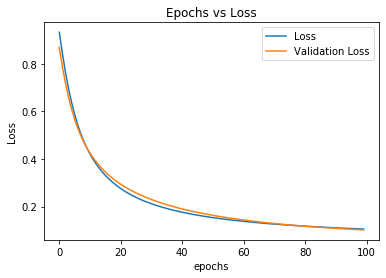

In [41]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(results.history['loss'], label='Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title("Epochs vs Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

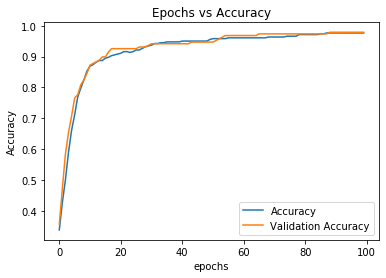

In [42]:
# Plot what's returned by model.fit() for accuracy
plt.plot(results.history['accuracy'], label='Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.title("Epochs vs Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()